# Preprocessing Dataset #1: Adults

In [1]:
import pandas as pd

# 1. Load the datasets into Pandas dataframes
names1=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'over-50K']
dataset1 = pd.read_csv('adult.csv', index_col=False, names=names1, sep=',\s', na_values=['?'], engine='python')
print(dataset1.shape)
print(dataset1)

(32561, 15)
       age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors             13   
1       50  Self-emp-not-inc   83311   Bachelors             13   
2       38           Private  215646     HS-grad              9   
3       53           Private  234721        11th              7   
4       28           Private  338409   Bachelors             13   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm             12   
32557   40           Private  154374     HS-grad              9   
32558   58           Private  151910     HS-grad              9   
32559   22           Private  201490     HS-grad              9   
32560   52      Self-emp-inc  287927     HS-grad              9   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      Married-civ-spouse  

## Clean the data

In [2]:
# Remove instances with missing/invalid data entries
dataset1.dropna(axis=0, how='any', inplace=True)
print(dataset1.shape)

(30162, 15)


In [3]:
# Encode Over 50K as 1
dataset1['over-50K'] = dataset1['over-50K'].map({'>50K': 1, '<=50K': 0})
print (dataset1['over-50K'])

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: over-50K, Length: 30162, dtype: int64


In [4]:
# Encode Male as 1
dataset1['sex'] = dataset1['sex'].map({'Male': 1, 'Female': 0})

In [5]:
dataset1['native-country'].describe()

count             30162
unique               41
top       United-States
freq              27504
Name: native-country, dtype: object

Since 91% of native-country data is US, we will categorize this column as "US" and "non-US".

In [6]:
import numpy as np
# Encode US as 1 and non-US as 0
dataset1['native-country'] = np.where(dataset1['native-country']=='United-States', 1, 0)

## Visualization

In [7]:
import matplotlib.pyplot as plt

In [8]:
dataset1['race'].describe()

count     30162
unique        5
top       White
freq      25933
Name: race, dtype: object

(array([25933.,     0.,  2817.,     0.,     0.,   895.,     0.,   286.,
            0.,   231.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

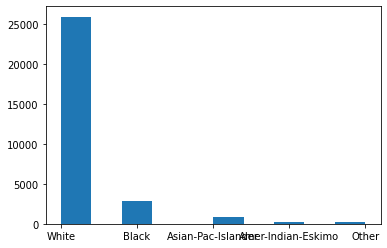

In [9]:
plt.hist(dataset1['race'], histtype='bar')

(array([  511.,  1877.,  1995., 16582.,  3004.,  3736.,  1721.,   421.,
          184.,   131.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

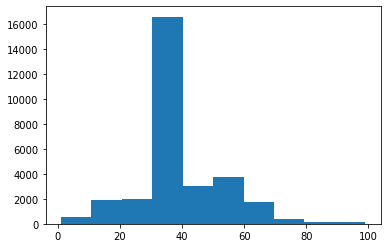

In [10]:
plt.hist(dataset1['hours-per-week'], histtype='bar')

(array([14884.,  1048.,  2082.,  6678.,  1565.,   375.,  1849.,   288.,
          865.,   528.]),
 array([ 0. ,  1.5,  3. ,  4.5,  6. ,  7.5,  9. , 10.5, 12. , 13.5, 15. ]),
 <BarContainer object of 10 artists>)

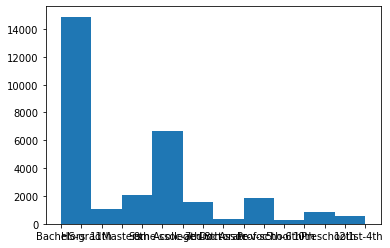

In [11]:
plt.hist(dataset1['education'], histtype='bar')

## One-hot encoding

In [12]:
import sklearn
from sklearn.model_selection import train_test_split

# Split into training, validation, and tests
X = dataset1.drop(['over-50K'], axis=1) # drop column about over or under-50K (salary)
Y = dataset1['over-50K']

X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.15, shuffle=True)
print(Y_train.shape, Y_test.shape)

(25637,) (4525,)


In [13]:
import category_encoders as ce

# Convert discrete variables into multiple variables using one-hot encoding
# Discrete columns: workclass, education, marital-status, occupation, relationship, sex, native-country
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital-status', 'occupation', 'race', 'relationship'], use_cat_names=True)
train_encoded_1 = encoder.fit_transform(X_train)
test_encoded_1 = encoder.transform(X_test) 


/usr/local/lib/python3.9/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


# Preprocessing Dataset #2

## Import the data

In [14]:
import pandas as pd

# 1. Load the datasets into Pandas dataframes
names2=['A1-Time','A2','A3','A4','A5','A6','A7','A8','A9','LABEL']
dataset2 = pd.read_csv('shuttle_trn.csv', index_col=False, names=names2, sep=' ', engine='python')
print(dataset2)

       A1-Time  A2   A3  A4  A5  A6  A7  A8  A9  LABEL
0           50  21   77   0  28   0  27  48  22      2
1           55   0   92   0   0  26  36  92  56      4
2           53   0   82   0  52  -5  29  30   2      1
3           37   0   76   0  28  18  40  48   8      1
4           37   0   79   0  34 -26  43  46   2      1
...        ...  ..  ...  ..  ..  ..  ..  ..  ..    ...
43495       46   5   78   0  46   5  32  32   0      1
43496       37   0   79  -1  10   3  43  69  26      1
43497       48   0   78   3  46   0  30  32   2      1
43498       41   0   79   0  38 -25  38  40   2      1
43499       40  -3  100   0  38   0  61  62   2      1

[43500 rows x 10 columns]


## Clean the data

In [15]:
# Data is complete, i.e., no missing cells
# Attributes are undefined, therefore all will be kept and be given the same weight

## Visulization

In [16]:
# Visualizing data to have a better idea of the data
# Plotting frequency of different attribute values since there are only 9 (+ 1 for assigned labels)
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'A1-Time')

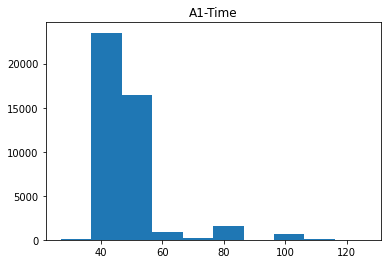

In [17]:
plt.hist(dataset2['A1-Time'], histtype='bar')
plt.title("A1-Time")

Text(0.5, 1.0, 'A2')

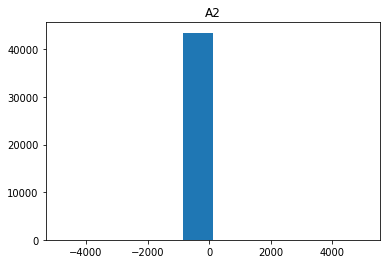

In [18]:
plt.hist(dataset2['A2'], histtype='bar')
plt.title("A2")

Text(0.5, 1.0, 'A3')

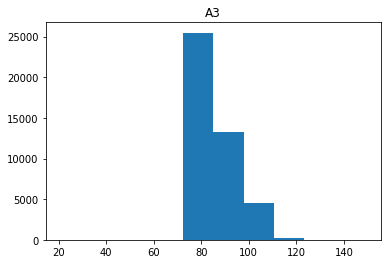

In [19]:
plt.hist(dataset2['A3'], histtype='bar')
plt.title("A3")

Text(0.5, 1.0, 'A4')

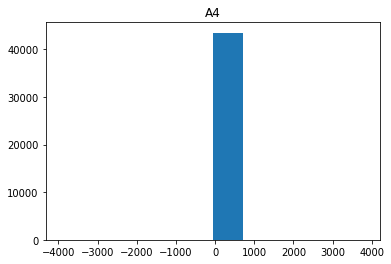

In [20]:
plt.hist(dataset2['A4'], histtype='bar')
plt.title("A4")

Text(0.5, 1.0, 'A5')

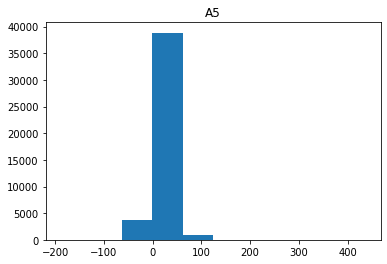

In [21]:
plt.hist(dataset2['A5'], histtype='bar')
plt.title("A5")

Text(0.5, 1.0, 'A6')

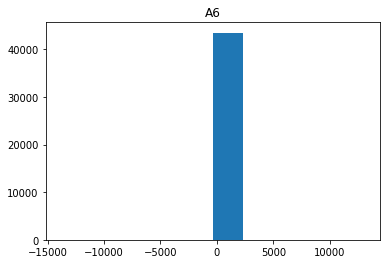

In [22]:
plt.hist(dataset2['A6'], histtype='bar')
plt.title("A6")

Text(0.5, 1.0, 'A7')

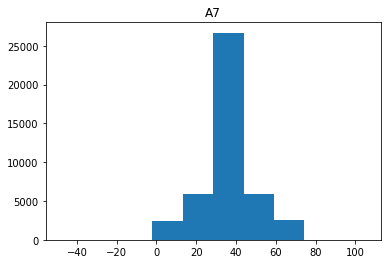

In [23]:
plt.hist(dataset2['A7'], histtype='bar')
plt.title("A7")

Text(0.5, 1.0, 'A8')

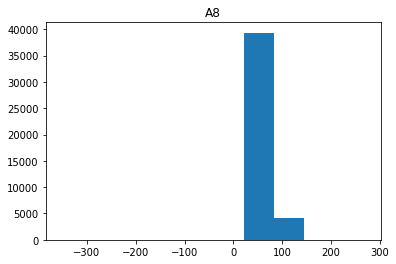

In [24]:
plt.hist(dataset2['A8'], histtype='bar')
plt.title("A8")

Text(0.5, 1.0, 'A9')

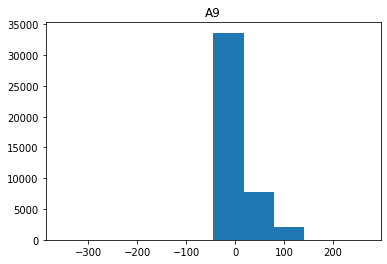

In [25]:
plt.hist(dataset2['A9'], histtype='bar')
plt.title("A9")

Text(0.5, 1.0, 'LABEL')

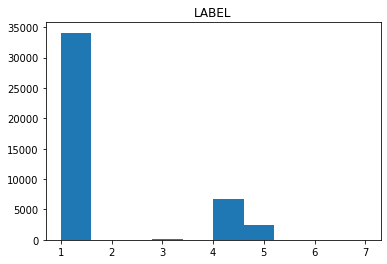

In [26]:
plt.hist(dataset2['LABEL'], histtype='bar')
plt.title("LABEL")

## One-hot coding

In [27]:
# No need for one-hot coding since all attributes and labels are numerical values